In [1]:
import pandas as pd 
import numpy as np

In [3]:
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()

# Data is in array form

In [4]:
data_cancer


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

# Convering the array data to dataframe using pandas 

In [5]:
data = pd.DataFrame(data = data_cancer.data, columns= data_cancer.feature_names)
data['target'] = pd.Series(data_cancer.target)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Using only two features as inpu features

In [6]:
X = data [['mean radius', 'mean texture']]
Y = data['target']

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size= 0.3, random_state=40)

# KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

# Prediction


In [9]:
from sklearn.metrics import accuracy_score
pred = knn.predict(xtest)
accuracy_score(ytest,pred)

0.8596491228070176

In [10]:
knn.predict([[12.33, 15.05]])

c:\Users\kanis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

# Decision Boundary of the model

c:\Users\kanis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\kanis\AppData\Local\Temp\ipykernel_14488\4156418067.py:15: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx,yy,Z,alpha = 0.8, camp = 'coolwarm')


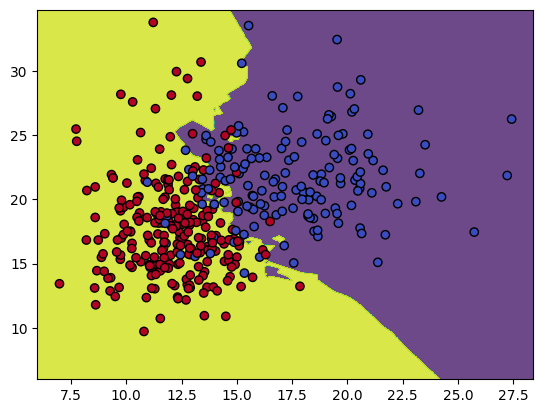

In [11]:
# create a mesh grid for plotting the decision boundary
x_min,x_max = xtrain.iloc[:,0].min() - 1 , xtrain.iloc[:,0].max()+1
y_min,y_max = xtrain.iloc[:,0].min() - 1 , xtrain.iloc[:,1].max()+1

xx , yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


# predict on the grid

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z  = Z.reshape(xx.shape)

# plot thte decision boundary 
import matplotlib.pyplot as plt
plt.contourf(xx,yy,Z,alpha = 0.8, camp = 'coolwarm')


# plot the training point 
plt.scatter(xtrain.iloc[:,0], xtrain.iloc[:,1], c = ytrain , edgecolor = 'k', cmap = 'coolwarm')